<a href="https://colab.research.google.com/github/samanthajmichael/dsba6211-summer2024--project/blob/main/01_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Equity Lines of Credit (HELOC) Classification Project

## Data Preparation

In [1]:
%%capture
!pip install datasets

In [2]:
from datasets import load_dataset
import pandas as pd
pd.set_option('display.max_columns', None)

# Load the HELOC dataset
heloc_dataset = load_dataset('mstz/heloc')
df = heloc_dataset['train'].to_pandas()

Generating train split:   0%|          | 0/10459 [00:00<?, ? examples/s]

In [3]:
df

,estimate_of_risk,months_since_first_trade,months_since_last_trade,average_duration_of_resolution,number_of_satisfactory_trades,nr_trades_insolvent_for_over_60_days,nr_trades_insolvent_for_over_90_days,percentage_of_legal_trades,months_since_last_illegal_trade,maximum_illegal_trades_over_last_year,maximum_illegal_trades,nr_total_trades,nr_trades_initiated_in_last_year,percentage_of_installment_trades,months_since_last_inquiry_not_recent,nr_inquiries_in_last_6_months,nr_inquiries_in_last_6_months_not_recent,net_fraction_of_revolving_burden,net_fraction_of_installment_burden,nr_revolving_trades_with_balance,nr_installment_trades_with_balance,nr_banks_with_high_ratio,percentage_trades_with_balance,is_at_risk
0,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69,1
1,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0,1
2,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86,1
3,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91,1
4,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73,131,5,57,21,0,0,95,80,6,6,21,5,19,7,0,0,26,-8,5,2,0,100,0
10455,65,147,39,68,11,0,0,92,28,6,6,12,0,42,1,1,1,86,53,2,2,1,80,1
10456,74,129,6,64,18,1,1,100,-7,6,8,18,1,33,3,4,4,6,-8,5,-8,0,56,1
10457,72,234,12,113,42,2,2,96,35,6,2,45,0,20,6,0,0,19,-8,4,1,0,38,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   estimate_of_risk                          10459 non-null  int8 
 1   months_since_first_trade                  10459 non-null  int32
 2   months_since_last_trade                   10459 non-null  int32
 3   average_duration_of_resolution            10459 non-null  int32
 4   number_of_satisfactory_trades             10459 non-null  int16
 5   nr_trades_insolvent_for_over_60_days      10459 non-null  int16
 6   nr_trades_insolvent_for_over_90_days      10459 non-null  int16
 7   percentage_of_legal_trades                10459 non-null  int16
 8   months_since_last_illegal_trade           10459 non-null  int32
 9   maximum_illegal_trades_over_last_year     10459 non-null  int8 
 10  maximum_illegal_trades                    10459 non-null  

In [5]:
df.describe()

,estimate_of_risk,months_since_first_trade,months_since_last_trade,average_duration_of_resolution,number_of_satisfactory_trades,nr_trades_insolvent_for_over_60_days,nr_trades_insolvent_for_over_90_days,percentage_of_legal_trades,months_since_last_illegal_trade,maximum_illegal_trades_over_last_year,maximum_illegal_trades,nr_total_trades,nr_trades_initiated_in_last_year,percentage_of_installment_trades,months_since_last_inquiry_not_recent,nr_inquiries_in_last_6_months,nr_inquiries_in_last_6_months_not_recent,net_fraction_of_revolving_burden,net_fraction_of_installment_burden,nr_revolving_trades_with_balance,nr_installment_trades_with_balance,nr_banks_with_high_ratio,percentage_trades_with_balance,is_at_risk
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,5.510183,20.856965,1.253083,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166,0.521943
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,3.971182,14.580905,3.068684,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565,0.499542
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,5.000000,12.000000,0.000000,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000,0.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,6.000000,20.000000,1.000000,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000,1.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,8.000000,29.000000,3.000000,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000,1.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,8.000000,104.000000,19.000000,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000,1.000000


In [6]:
print(df['is_at_risk'].isnull().sum())

0


In [7]:
# 0 = Good, 1 = Bad
df['is_at_risk'].value_counts().reset_index()

,is_at_risk,count
0,1,5459
1,0,5000


In [8]:
X = df.drop('is_at_risk', axis=1)
y = df['is_at_risk']

# Preliminary EDA

In [9]:
print("Check for NaN values in y:")
print(y.isnull().sum())

Check for NaN values in y:
0


## Predictor Variables

In [10]:
import plotly.express as px
X = X.rename(columns={'estimate_of_risk':'Estimate of Risk',
                      'months_since_first_trade': 'Months Since First Trade',
                      'months_since_last_trade': 'Months Since Last Trade',
                      'average_duration_of_resolution': 'Average Duration of Resolution',
                      'number_of_satisfactory_trades': 'Number of Satisfactory Trades',
                      'nr_trades_insolvent_for_over_60_days': 'NR Trades Insolvent for Over 60 Days',
                      'nr_trades_insolvent_for_over_90_days': 'NR Trades Insolvent for Over 90 Days',
                      'percentage_of_legal_trades': 'Percentage of Legal Trades',
                      'months_since_last_illegal_trade': 'Months Since Last Illegal Trade',
                      'maximum_illegal_trades_over_last_year': 'Maximum Illegal Trades over Last Year',
                      'maximum_illegal_trades': 'Maximum Illegal Trades',
                      'nr_total_trades': 'NR Total Trades',
                      'nr_trades_initiated_in_last_year': 'NR Trades Initiated in Last Year',
                      'percentage_of_installment_trades': 'Percentage of Installment Trades',
                      'months_since_last_inquiry_not_recent': 'Months Since Last Inquiry Not Recent',
                      'nr_inquiries_in_last_6_months': 'NR Inquiries in Last 6 Months',
                      'nr_inquiries_in_last_6_months_not_recent': 'NR Inquiries in Last 6 Months Not Recent',
                      'net_fraction_of_revolving_burden': 'Net Fraction of Revolving Burden',
                      'net_fraction_of_installment_burden': 'Net Fraction of Installment Burden',
                      'nr_revolving_trades_with_balance': 'NR Revolving Trades with Balance',
                      'nr_installment_trades_with_balance': 'NR Installment Trades with Balance',
                      'nr_banks_with_high_ratio': 'NR Banks with High Ratio'
                      })

for x_var in X.columns:
    fig = px.histogram(X, x=x_var, nbins=40, title=f'Distribution of {x_var}')
    fig.show()

## **Observation:** The data seems to be skewed due to some outliers.
## Let's explore this next.

# Special Values

## As with most real world data sets, some special values were encountered and were defined as follows: [-9,-8,-7]
- ### **-9**: indicates that the credit bureau report was not investigated or not found
- ### **-8**: denotes the absence of usable information
- ### **-7**: specifies that no information of that type was available at the time the sample was taken

## There were no missing values outside of the special values previously described

In [11]:
# Stacked Bar Chart for Special Value -7
feature_names = df.columns[1:24]

Count = pd.DataFrame(columns=['feature', 'is_at_risk', 'count'])

for i in range(1, 24):
    counts = df['is_at_risk'][df.iloc[:, i] == -7].value_counts().fillna(0).reset_index()
    counts.columns = ['is_at_risk', 'count']
    counts['feature'] = feature_names[i-1]
    Count = pd.concat([Count, counts], axis=0)

fig = px.bar(Count, x='feature', y='count', color='is_at_risk', title='Stacked Bar Charts for Special Value -7',
             labels={'feature': 'Features', 'count': 'Count'}, width=800, height=500)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [12]:
# Stacked Bar Chart for Special Value -8
Count = pd.DataFrame(columns=['feature', 'is_at_risk', 'count'])

for i in range(1, 24):
    counts = df['is_at_risk'][df.iloc[:, i] == -8].value_counts().fillna(0).reset_index()
    counts.columns = ['is_at_risk', 'count']
    counts['feature'] = feature_names[i-1]
    Count = pd.concat([Count, counts], axis=0)

fig = px.bar(Count, x='feature', y='count', color='is_at_risk', title='Stacked Bar Charts for Special Value -8',
             labels={'feature': 'Features', 'count': 'Count'}, width=1000, height=800)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [13]:
# Stacked Bar Chart for Special Value -9
Count = pd.DataFrame(columns=['feature', 'is_at_risk', 'count'])

for i in range(1, 24):
    counts = df['is_at_risk'][df.iloc[:, i] == -9].value_counts().fillna(0).reset_index()
    counts.columns = ['is_at_risk', 'count']
    counts['feature'] = feature_names[i-1]
    Count = pd.concat([Count, counts], axis=0)

fig = px.bar(Count, x='feature', y='count', color='is_at_risk', title='Stacked Bar Charts for Special Value -9',
             labels={'feature': 'Features', 'count': 'Count'}, width=1000, height=800)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

# Target Variable

In [14]:
# Count plot of 'Is at Risk'
counts = df['is_at_risk'].value_counts().reset_index()
counts.columns = ['is_at_risk', 'count']

fig = px.bar(counts, x='is_at_risk', y='count',
             labels={'is_at_risk': 'Is at Risk', 'count': 'Count'},
             title='Count Plot of "Is at Risk" Variable')

fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=['No', 'Yes']
)

fig.show()

# Scatterplots
- ## Due to the scale of the data, predictor variables have been divided into two subsets.
- ## These plots take about 2 minutes each to run. Uncomment if you would like to run them.  

In [15]:
"""import seaborn as sns
import matplotlib.pyplot as plt

# Define the variables to include in the scatterplot
variables_subset = ['estimate_of_risk', 'months_since_first_trade', 'months_since_last_trade', 'average_duration_of_resolution', 'number_of_satisfactory_trades', 'nr_trades_insolvent_for_over_60_days',
'nr_trades_insolvent_for_over_90_days', 'percentage_of_legal_trades', 'months_since_last_illegal_trade', 'maximum_illegal_trades_over_last_year', 'maximum_illegal_trades', 'nr_total_trades', 'nr_trades_initiated_in_last_year']
df_subset = df[variables_subset + ['is_at_risk']]

# Create a pairplot using Seaborn
sns.pairplot(df_subset, hue='is_at_risk')

# Show the plot
plt.show()"""

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Define the variables to include in the scatterplot\nvariables_subset = ['estimate_of_risk', 'months_since_first_trade', 'months_since_last_trade', 'average_duration_of_resolution', 'number_of_satisfactory_trades', 'nr_trades_insolvent_for_over_60_days', \n'nr_trades_insolvent_for_over_90_days', 'percentage_of_legal_trades', 'months_since_last_illegal_trade', 'maximum_illegal_trades_over_last_year', 'maximum_illegal_trades', 'nr_total_trades', 'nr_trades_initiated_in_last_year']\ndf_subset = df[variables_subset + ['is_at_risk']]\n\n# Create a pairplot using Seaborn\nsns.pairplot(df_subset, hue='is_at_risk')\n\n# Show the plot\nplt.show()"

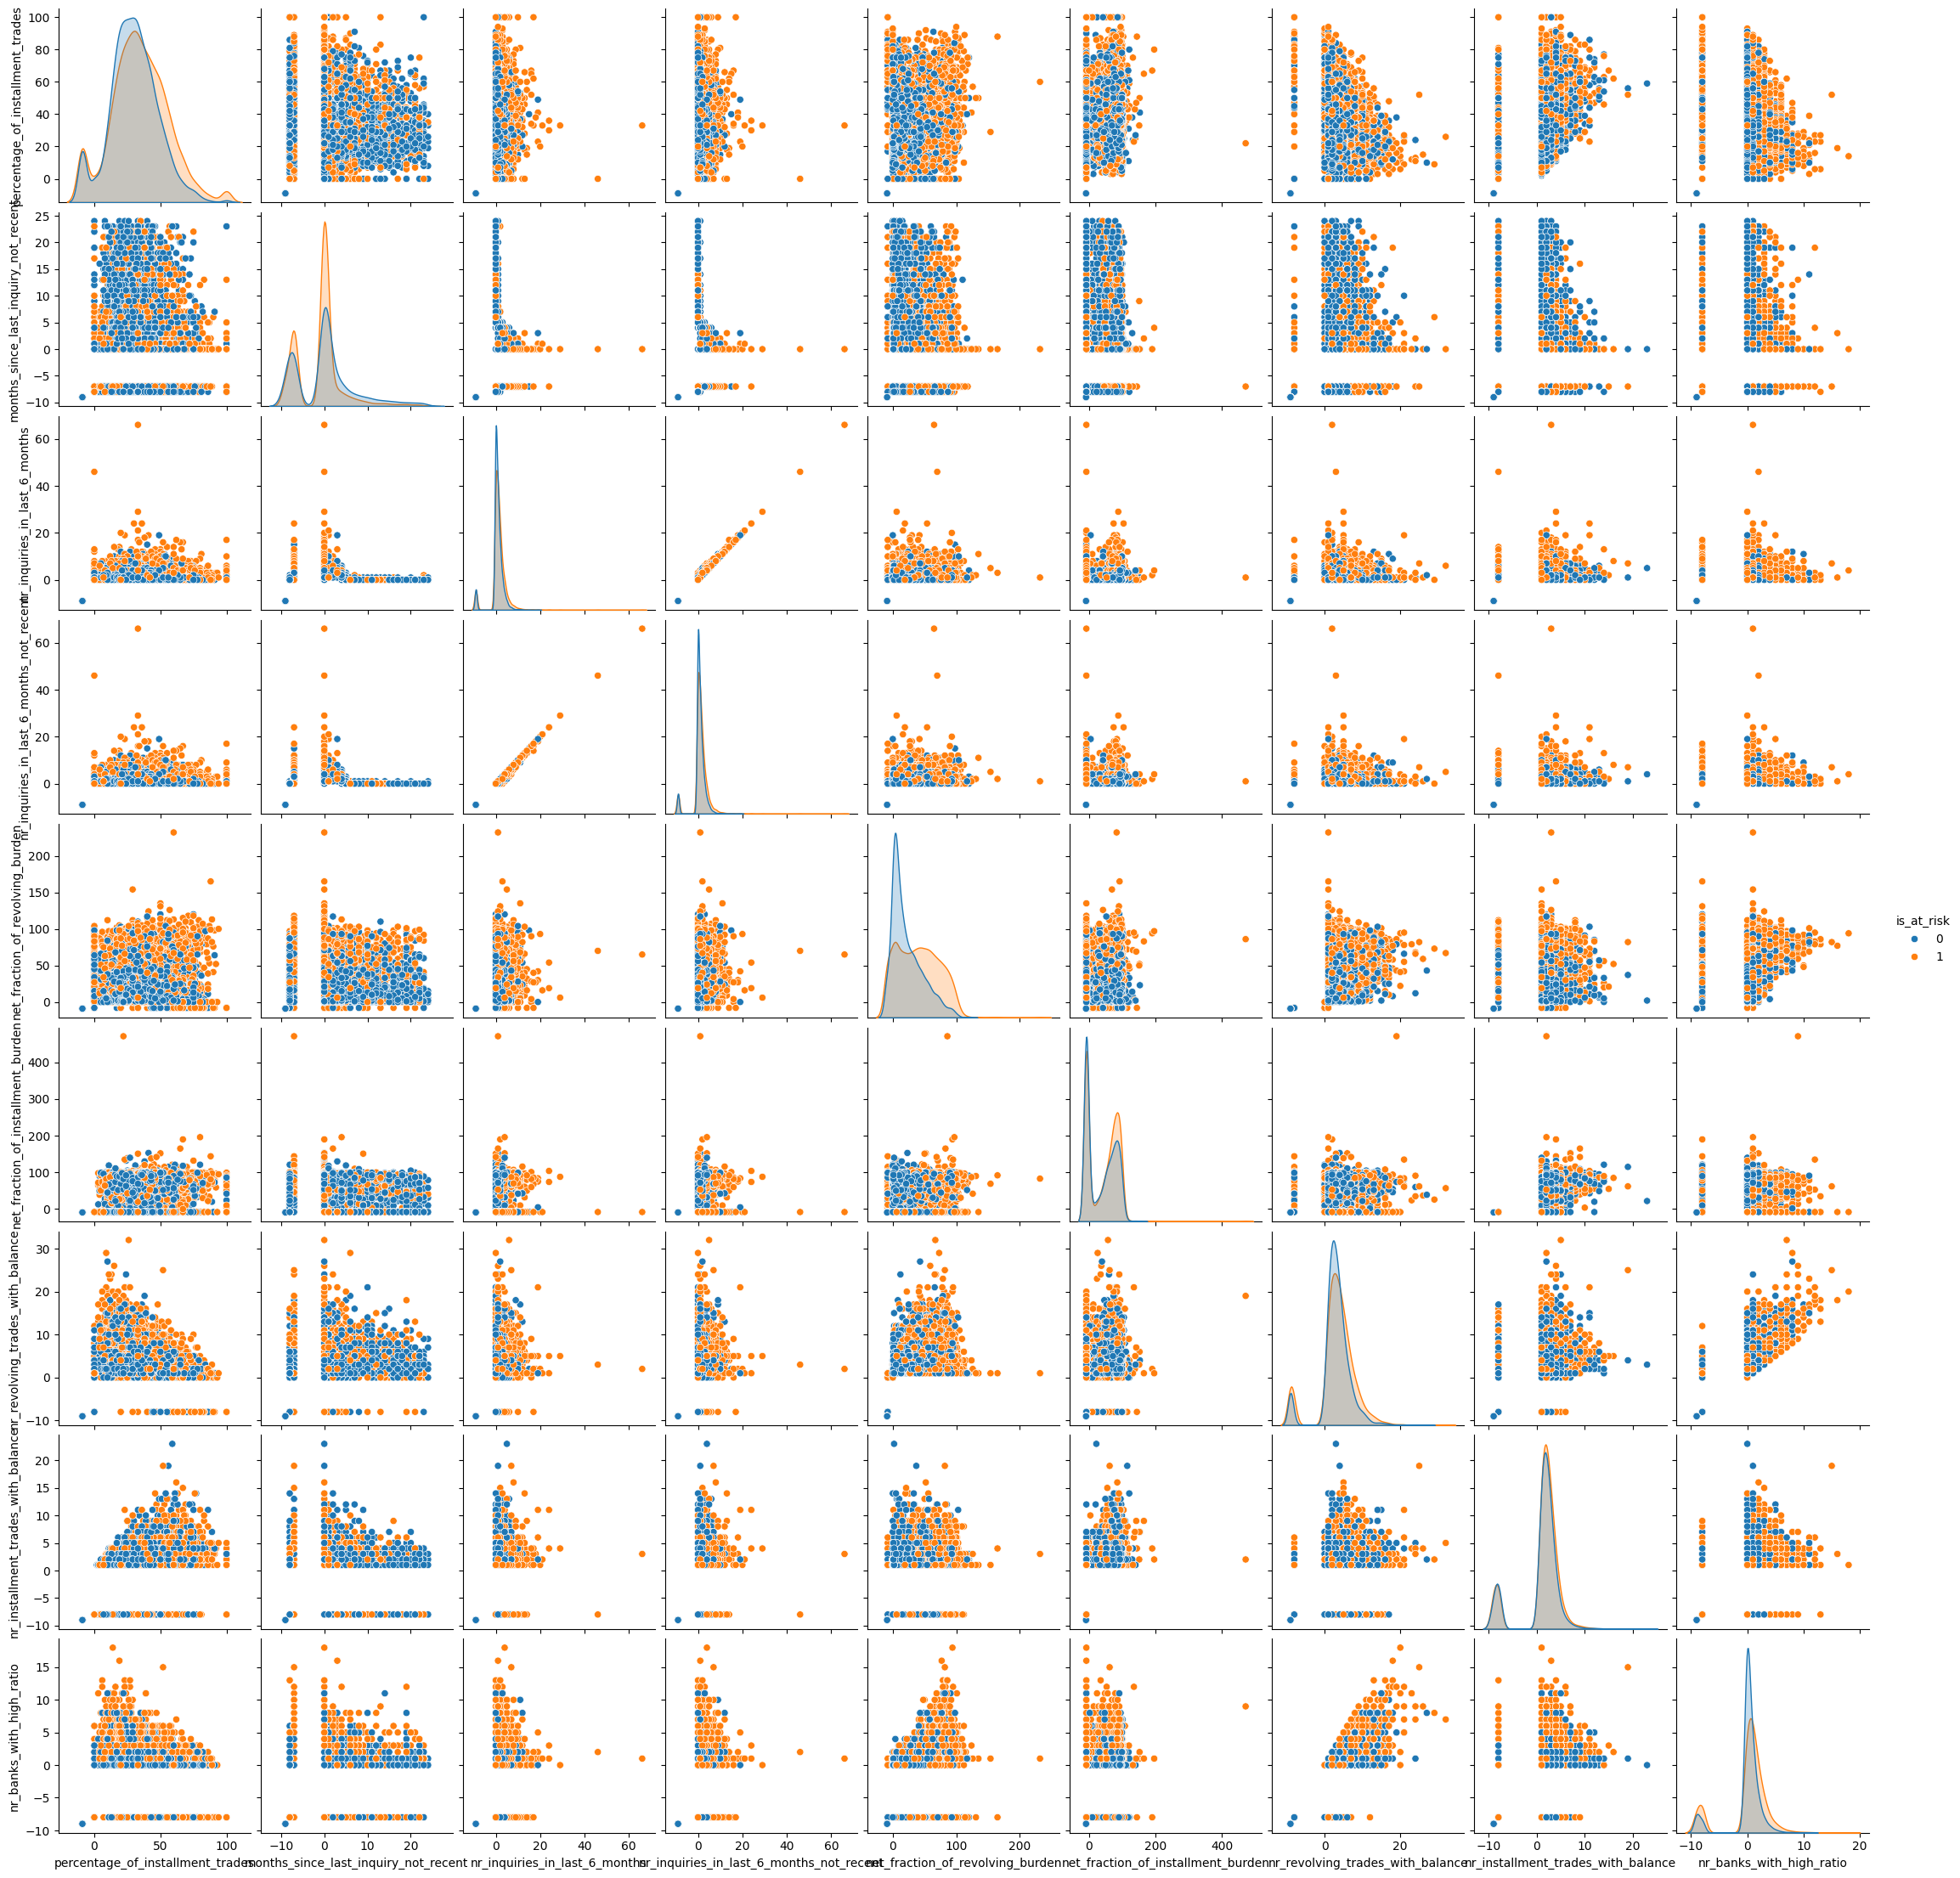

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_subset_2 = ['percentage_of_installment_trades', 'months_since_last_inquiry_not_recent', 'nr_inquiries_in_last_6_months', 'nr_inquiries_in_last_6_months_not_recent', 'net_fraction_of_revolving_burden', 'net_fraction_of_installment_burden',
'nr_revolving_trades_with_balance', 'nr_installment_trades_with_balance', 'nr_banks_with_high_ratio']
df_subset = df[variables_subset_2 + ['is_at_risk']]

sns.pairplot(df_subset, hue='is_at_risk')

plt.show()

# Correlation Heatmap

In [17]:
corr_matrix = df.corr()

fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='Viridis',
                aspect="auto")

fig.update_traces(text=corr_matrix.round(2).values, texttemplate="%{text}")

fig.update_layout(title="Heatmap of Correlation Coefficients",
                  width=1300, height=1300)

fig.update_xaxes(tickangle=45)

fig.show()

# Outliers

In [18]:
#Calculating the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lowerq = Q1
upperq = Q3

#Printing lower outliers
lower_bound = lowerq - (1.5 * IQR)
lower_bound
print("Values below are lower outliers:")
print(f'{lower_bound}')

Values below are lower outliers:
estimate_of_risk                             39.00
months_since_first_trade                    -79.25
months_since_last_trade                      -9.00
average_duration_of_resolution              -12.50
number_of_satisfactory_trades               -10.50
nr_trades_insolvent_for_over_60_days         -1.50
nr_trades_insolvent_for_over_90_days          0.00
percentage_of_legal_trades                   67.50
months_since_last_illegal_trade             -38.50
maximum_illegal_trades_over_last_year        -0.50
maximum_illegal_trades                        0.50
nr_total_trades                             -13.50
nr_trades_initiated_in_last_year             -4.50
percentage_of_installment_trades            -16.00
months_since_last_inquiry_not_recent        -19.00
nr_inquiries_in_last_6_months                -3.00
nr_inquiries_in_last_6_months_not_recent     -3.00
net_fraction_of_revolving_burden            -68.50
net_fraction_of_installment_burden         -138.5

In [19]:
#Printing upper outliers
upper_bound = upperq + (1.5 * IQR)
upper_bound
print("Values above are upper outliers:")
print(f'{upper_bound}')

Values above are upper outliers:
estimate_of_risk                            103.00
months_since_first_trade                    446.75
months_since_last_trade                      23.00
average_duration_of_resolution              159.50
number_of_satisfactory_trades                49.50
nr_trades_insolvent_for_over_60_days          2.50
nr_trades_insolvent_for_over_90_days          0.00
percentage_of_legal_trades                  119.50
months_since_last_illegal_trade              45.50
maximum_illegal_trades_over_last_year        11.50
maximum_illegal_trades                       12.50
nr_total_trades                              54.50
nr_trades_initiated_in_last_year              7.50
percentage_of_installment_trades             80.00
months_since_last_inquiry_not_recent         13.00
nr_inquiries_in_last_6_months                 5.00
nr_inquiries_in_last_6_months_not_recent      5.00
net_fraction_of_revolving_burden            127.50
net_fraction_of_installment_burden          209.5

# Initial Findings
## **Data Redundancy:** In the process of refining the dataset, redundancies among the variables were identified and addressed to enhance the efficiency of the analysis.

- ## It was discovered that the variables nr_trades_insolvent_for_over_60_days and nr_trades_insolvent_for_over_90_days exhibited a high correlation. Given that the 90-day variable inherently includes the data captured by the 60-day variable, retaining both was deemed unnecessary. Consequently, nr_trades_insolvent_for_over_90_days was retained, and nr_trades_insolvent_for_over_60_days was removed.

- ## A significant correlation was observed between maximum_illegal_trades and maximum_illegal_trades_over_last_year. Since maximum_illegal_trades spans the entire two-year period of interest, it incorporates the information provided by the one-year metric. To avoid redundancy and maintain a streamlined dataset, maximum_illegal_trades was retained, and maximum_illegal_trades_over_last_year was excluded.

- ## Similarly, for nr_total_trades and nr_trades_initiated_in_last_year it was determined that nr_total_trades provides a more comprehensive and interesting variable and will be kept and nr_trades_initiated_in_last_year will be excluded.  

- ## Variables nr_revolving_trades_with_balance, nr_installment_trades_with_balance, and percentage_trades_with_balance were eliminated due to their reliance on balance information that was not available. This decision enhances the model's reliability by ensuring it is built on complete, verifiable data. Removing these incomplete variables streamlines the classification process and potentially improves prediction accuracy.

- ## Net_fraction_of_installment_burden was removed as it contained 3,419 values for -8 meaning no usable information was found for over a third of the instances in the dataset.

- ## Nr_inquiries_in_last_6_months_not_recent was deleted as it is too correlated with net_fraction_of_revolving_burden (.48).

## **Missing Information & Cryptic Interpretations**
- ## Net_fraction_of_installment_burden was removed as it contained 3,419 values for -8 meaning no usable information was found for over a third of the instances in the dataset.

- ## Average_duration_of_resolution, percentage_of_installment_trades, months_since_last_inquiry_not_recent, were determined to have cryptic interpretations and were deleted from the dataset.

## Remaining Predictor variables:
- is_at_risk
- estimate_of_risk
- months_since_first_trade
- months_since_last_trade
- number_of_satisfactory_trades
- nr_trades_insolvent_for_over_90_days
- percentage_of_legal_trades
- months_since_last_illegal_trade
- maximum_illegal_trades
- nr_total_trades
- nr_inquiries_in_last_6_months
- net_fraction_of_revolving_burden
- nr_banks_with_high_ratio